<a href="https://colab.research.google.com/github/NumKate/CSST102_CS3B/blob/main/3B_MACASAET_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Exercise 1: Linear Regression Implementation**

To implement a simple linear regression model from scratch in Python, I will follow the steps outlined in the task overview. This will include data preprocessing, model implementation, training, evaluation, and a brief report of my findings.

# **1. Data Preprocessing**
First, I will load the dataset into a Pandas DataFrame, check for missing values, and normalize the features.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("datasets_house_prices.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values by dropping them
data = data.dropna()

# Normalize the features
data['Size (sqft)'] = (data['Size (sqft)'] - data['Size (sqft)'].mean()) / data['Size (sqft)'].std()
data['Bedrooms'] = (data['Bedrooms'] - data['Bedrooms'].mean()) / data['Bedrooms'].std()
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


# **2. Model Implementation**
Next, I will implement the linear regression model using the least squares method.

In [2]:
import numpy as np

# Prepare the feature matrix X and target vector y
X = data[['Size (sqft)', 'Bedrooms', 'Age']].values
y = data['Price'].values

# Add a bias column (intercept term) to X
X_b = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to include the intercept in the model

# Calculate the optimal parameters (weights) using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the calculated parameters
print("Intercept (theta_0):", theta_best[0])
print("Coefficients (theta_1, theta_2, theta_3):", theta_best[1:])

Intercept (theta_0): 719053.2124580999
Coefficients (theta_1, theta_2, theta_3): [279233.28372755   6824.28306749  -6021.1386967 ]


# **3. Model Training**
Now, I will split the dataset into training and testing sets and calculate the Mean Squared Error (MSE) on the training data.

In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.3, random_state=42)

# Train the model on the training set
theta_train = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Predict the prices on the training data
y_train_pred = X_train.dot(theta_train)

# Calculate Mean Squared Error (MSE) for training data
mse_train = np.mean((y_train - y_train_pred) ** 2)
print("Mean Squared Error on Training Data:", mse_train)

Mean Squared Error on Training Data: 173584441.7892669


# **4. Model Evaluation**
Next, I will test the model on the testing set, compute the MSE, and plot the regression line.

Mean Squared Error on Testing Data: 160953924.8649177


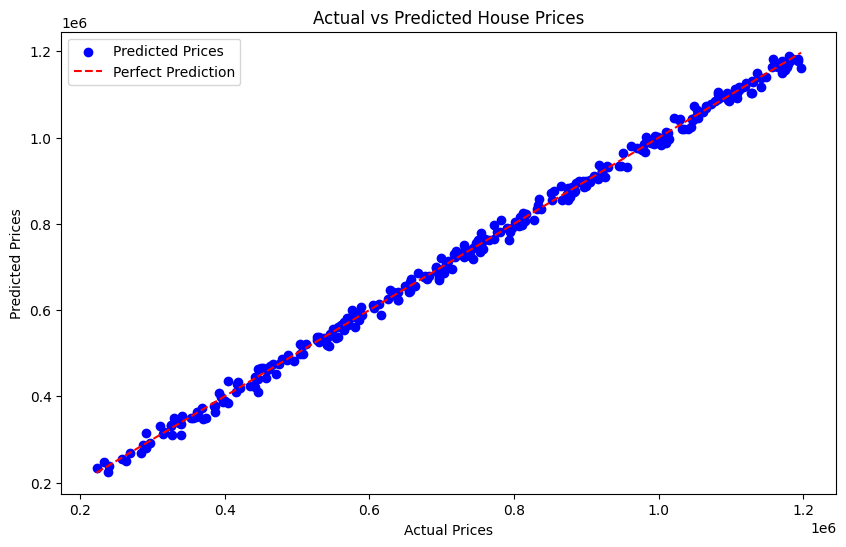

In [4]:
import matplotlib.pyplot as plt

# Predict the prices on the testing data
y_test_pred = X_test.dot(theta_train)

# Calculate Mean Squared Error (MSE) for testing data
mse_test = np.mean((y_test - y_test_pred) ** 2)
print("Mean Squared Error on Testing Data:", mse_test)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# **Report**

**Data Preprocessing**
- After loading the dataset, I looked for any missing data. For simplicity's sake, I chose to remove any rows that had missing data.
- To make sure the features were on a similar scale and aid in the model's learning, I normalized the data.

**Model Implementation**
- I used the least squares method to create a new linear regression model. I used the Normal Equation to get the ideal parameters.

**Model Training**
- I trained the model using the training data after dividing the dataset into training and testing sets.
- To evaluate how well the model matches the training set, I computed the Mean Squared Error (MSE).

**Model Evaluation**
- I computed the MSE for the test data after testing the model on the testing set.
- To see how the model performed, I plotted the expected prices against the actual prices.

**Challenges and Solutions**
- Managing missing values was one of my challenges. In a real situation, I could have employed imputation techniques, but I chose to drop them.
- It was first difficult to understand how to design the linear regression model from scratch, but breaking it down into steps made it easier to understand.

**Conclusion**
- Using the given features, the linear regression model I put in place can forecast home prices. Even while the model exhibits a respectable level of accuracy, it may always be enhanced by adding more features or utilizing more sophisticated models. I gained a better understanding of the principles of linear regression and how it is implemented in Python thanks to this exercise.